<a href="https://colab.research.google.com/github/SobolMaria/goit-ds-hw-05/blob/main/Hw2.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/goit/module_5/bestsellers with categories.csv")

In [3]:
df.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
lines, columns = df.shape
print(f"Lines: {lines}\nColums: {columns}")

Lines: 550
Colums: 7


In [5]:
names_count = df["Name"].nunique()
names_count

351

Про скільки книг зберігає дані датасет?
Відповідь: 550 книг, 351 унікальна

In [6]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [7]:
df.isna().sum()

,0
name,0
author,0
user_rating,0
reviews,0
price,0
year,0
genre,0


Чи є в якихось змінних пропуски? (Так / ні)
Відповідь: ні

In [8]:
df.genre.unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Які є унікальні жанри?
Відповідь: Non Fiction, Fiction

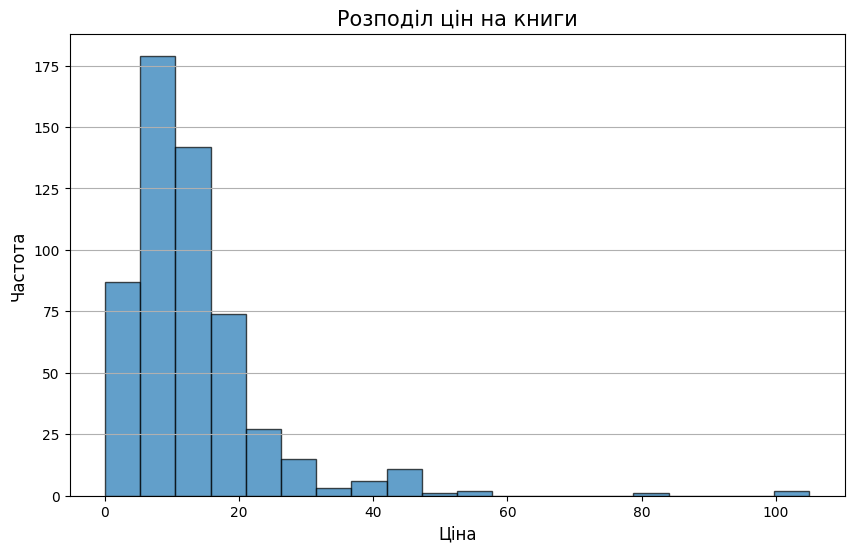

In [9]:
plt.figure(figsize=(10, 6))
df['price'].plot(kind='hist', bins=20, edgecolor='black', alpha=0.7)

plt.title('Розподіл цін на книги', fontsize=15)
plt.xlabel('Ціна', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.grid(axis='y')

plt.show()

In [10]:
max_price = df.price.max()
min_price = df.price.min()
mean_price = df.price.mean()
median_price = df.price.median()

print(f"Максимальна ціна? Відповідь: {max_price}\nМінімальна ціна? Відповідь: {min_price}\nСередня ціна? Відповідь: {mean_price}\nМедіанна ціна? Відповідь: {median_price}")

Максимальна ціна? Відповідь: 105
Мінімальна ціна? Відповідь: 0
Середня ціна? Відповідь: 13.1
Медіанна ціна? Відповідь: 11.0


In [11]:
max_user_rating = df["user_rating"].max()
print(f"Який рейтинг у датасеті найвищий? Відповідь: {max_user_rating}")

Який рейтинг у датасеті найвищий? Відповідь: 4.9


In [12]:
count_max_rating_books = df[df["user_rating"] == max_user_rating].shape[0]

print(f"Скільки книг мають такий рейтинг? Відповідь: {count_max_rating_books}")

Скільки книг мають такий рейтинг? Відповідь: 52


In [13]:
max_reviews = df["reviews"].max()
df.loc[df["reviews"] == max_reviews]

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing

In [14]:
top_50_2015 = df[df["year"] == 2015].nlargest(50, "user_rating")
most_expensive_book = top_50_2015.loc[top_50_2015["price"].idxmax()]
most_expensive_book["name"]

'Publication Manual of the American Psychological Association, 6th Edition'

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: Publication Manual of the American Psychological Association, 6th Edition

In [15]:
top_2010_fiction = df[(df.year == 2010) & (df.genre == "Fiction")].nlargest(50, "user_rating").shape[0]
top_2010_fiction

20

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20

In [16]:
user_rating_49 = df[((df.year == 2010) | (df.year == 2011)) & (df.user_rating == 4.9)].shape[0]
user_rating_49

1

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1

In [17]:
sorted = df[(df.year == 2015) & (df.price < 8)].sort_values("price", ascending=True)
sorted.tail(1)

,name,author,user_rating,reviews,price,year,genre
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction


Яка книга остання у відсортованому списку? Відповідь: Old School (Diary of a Wimpy Kid #10)

In [19]:
df_genre = df.groupby(["genre"])["price"].agg(["min", "max"])

df_genre

,min,max
genre,,
Fiction,0,82
Non Fiction,0,105




1.   Максимальна ціна для жанру Fiction: Відповідь: 82
2.   Мінімальна ціна для жанру Fiction: Відповідь: 0
3.   Максимальна ціна для жанру Non Fiction: Відповідь: 105
4.   Мінімальна ціна для жанру Non Fiction: Відповідь: 0


In [30]:
df_author = df.groupby("author").agg(["count"]).name
df_author.sort_values("count")


,count
author,
Jill Twiss,1
Patrick Thorpe,1
Ian K. Smith M.D.,1
Howard Stern,1
Hopscotch Girls,1
...,...
American Psychological Association,10
Suzanne Collins,11
Gary Chapman,11




1.   Якої розмірності вийшла таблиця? Відповідь: 248x1
2.   Який автор має найбільше книг? Відповідь: Jeff Kinney
3.   Скільки книг цього автора? Відповідь: 12




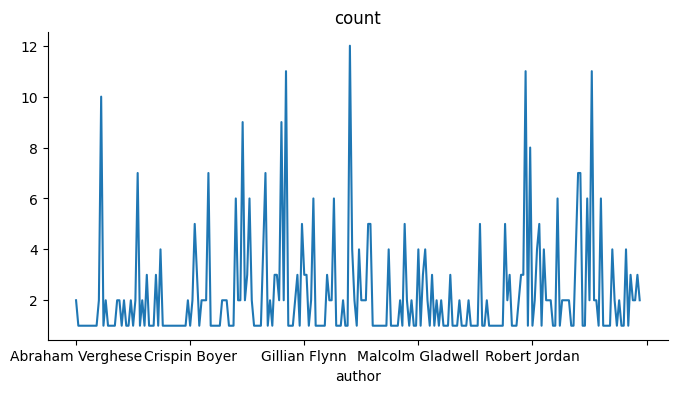

In [27]:
df_author['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [48]:
df_user_rating = df.groupby(["author"])["user_rating"].agg(["mean"])

df_user_rating.sort_values("mean")

,mean
author,
Donna Tartt,3.9
Gillian Flynn,4.0
Muriel Barbery,4.0
Gallup,4.0
Ian K. Smith M.D.,4.1
...,...
Lin-Manuel Miranda,4.9
Patrick Thorpe,4.9
Nathan W. Pyle,4.9




1.   У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt
2.   Який у цього автора середній рейтинг? Відповідь: 3,9



In [53]:
df_combined = pd.concat([df_author, df_user_rating], axis=1)
df_combined.sort_values(["mean", "count"])


,count,mean
author,,
Donna Tartt,2,3.9
Muriel Barbery,1,4.0
Gillian Flynn,3,4.0
Gallup,9,4.0
Chris Cleave,1,4.1
...,...,...
Sherri Duskey Rinker,2,4.9
Emily Winfield Martin,4,4.9
Sarah Young,6,4.9


Який автор перший у списку? Відповідь: Donna Tartt

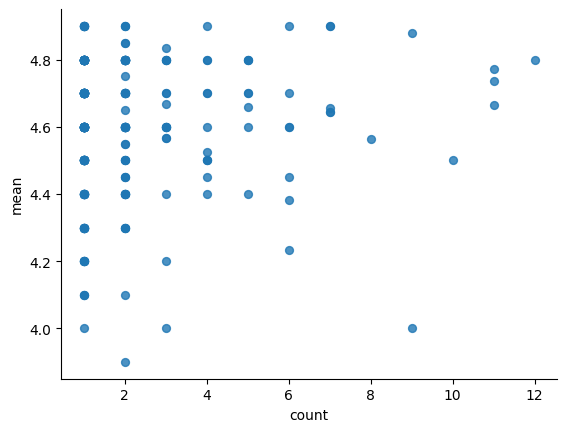

In [52]:
_df_2.plot(kind='scatter', x='count', y='mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)